In [1]:
import matplotlib.pyplot as plt
from model.run import run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 1, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
False
item 0 was sold to ARM for 6.0
no purchase from ARM this round
False
item 2 was sold to ARM for 8.0
True
item 0 was purchased from ARM for 6.0
False
item 3 was sold to ARM for 6.0
no purchase from ARM this round
False
item 4 was sold to ARM for 6.0
True
item 3 was purchased from ARM for 6.0
False
item 5 was sold to ARM for 3.0
True
item 2 was purchased from ARM for 8.0
False
item 0 was sold to ARM for 6.0
True
item 0 was purchased from ARM for 6.0
False
item 2 was sold to ARM for 8.0
no purchase from ARM this round
False
i

In [2]:
df

,reserve,items,model,simulation,subset,run,substep,timestep
3,44.0,{0: <model.model.items.Item object at 0x7fbba0...,<model.model.learning.Model object at 0x7fbba0...,0,0,1,3,1
6,42.0,{0: <model.model.items.Item object at 0x7fbbe8...,<model.model.learning.Model object at 0x7fbbe8...,0,0,1,3,2
9,36.0,{0: <model.model.items.Item object at 0x7fbbe8...,<model.model.learning.Model object at 0x7fbbe8...,0,0,1,3,3
12,36.0,{0: <model.model.items.Item object at 0x7fbbe8...,<model.model.learning.Model object at 0x7fbbe8...,0,0,1,3,4
15,41.0,{0: <model.model.items.Item object at 0x7fbbe8...,<model.model.learning.Model object at 0x7fbbe8...,0,0,1,3,5
...,...,...,...,...,...,...,...,...
288,10.0,{0: <model.model.items.Item object at 0x7fbb78...,<model.model.learning.Model object at 0x7fbb78...,0,0,1,3,96
291,7.0,{0: <model.model.items.Item object at 0x7fbbc8...,<model.model.learning.Model object at 0x7fbbc8...,0,0,1,3,97
294,2.0,{0: <model.model.items.Item object at 0x7fbbc8...,<model.model.learning.Model object at 0x7fbbc8...,0,0,1,3,98
297,2.0,{0: <model.model.items.Item object at 0x7fbbc8...,<model.model.learning.Model object at 0x7fbbc8...,0,0,1,3,99


Text(0.5, 0, 'time')

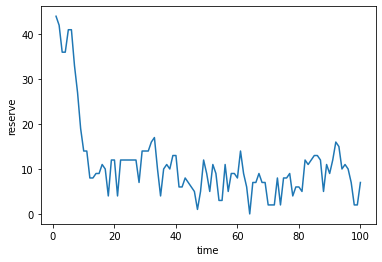

In [3]:
plt.plot(df.timestep, df.reserve)
plt.ylabel("reserve")
plt.xlabel("time")

Text(0.5, 0, 'time')

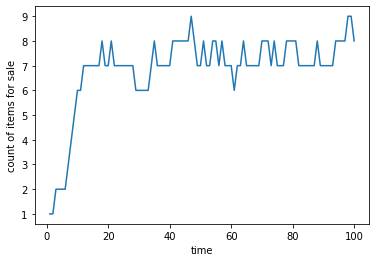

In [4]:
plt.plot(df.timestep, df['items'].apply(lambda x: len([x[k] for k in x if x[k].for_sale ])))
plt.ylabel("count of items for sale")
plt.xlabel("time")

In [5]:
attr= [i.attributes for i in df.iloc[-1]['items'].values()]
model = df.iloc[-1]['model']

In [6]:
arm_prices = [model.predict(a) for a in attr]

(array([ 3.,  3., 11., 23.,  0., 24., 28.,  5.,  3.,  1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

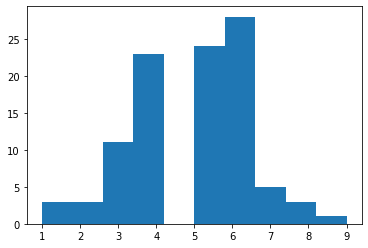

In [7]:
plt.hist(arm_prices)

In [8]:
df['attributes_counts']= df['items'].apply(lambda x: [x[k].attributes for k in x] ).apply(lambda z: np.array([z[i] for i in range(len(z))]).sum(axis=0))

In [9]:
list(df.attributes_counts.values.T)

[array([1, 0, 2, 1, 1, 1, 0, 2, 1, 2]),
 array([2, 1, 2, 2, 2, 2, 1, 3, 1, 3]),
 array([3, 1, 2, 2, 3, 3, 2, 4, 1, 4]),
 array([3, 1, 3, 3, 4, 4, 2, 5, 1, 5]),
 array([3, 1, 3, 4, 4, 5, 3, 5, 1, 5]),
 array([3, 1, 4, 5, 4, 6, 3, 5, 2, 5]),
 array([3, 1, 5, 6, 5, 6, 3, 5, 3, 6]),
 array([4, 1, 5, 6, 5, 7, 4, 6, 4, 7]),
 array([5, 2, 5, 7, 6, 8, 5, 6, 5, 8]),
 array([6, 2, 6, 7, 7, 8, 5, 7, 5, 9]),
 array([6, 2, 7, 7, 8, 9, 6, 7, 6, 9]),
 array([6, 3, 8, 8, 8, 9, 7, 8, 7, 9]),
 array([ 6,  4,  9,  8,  9,  9,  8,  8,  8, 10]),
 array([ 7,  5, 10,  9,  9, 10,  9,  8,  9, 10]),
 array([ 7,  5, 10, 10,  9, 10, 10,  8,  9, 11]),
 array([ 8,  6, 11, 11, 10, 10, 10,  9,  9, 11]),
 array([ 9,  7, 12, 11, 11, 10, 10,  9, 10, 12]),
 array([10,  8, 13, 12, 11, 10, 11,  9, 11, 12]),
 array([10,  9, 14, 13, 12, 10, 12,  9, 11, 12]),
 array([11,  9, 14, 13, 13, 10, 12, 10, 12, 13]),
 array([11,  9, 14, 13, 14, 11, 12, 11, 12, 13]),
 array([11, 10, 14, 14, 14, 11, 12, 12, 13, 14]),
 array([11, 10, 15, 

Text(0, 0.5, 'count')

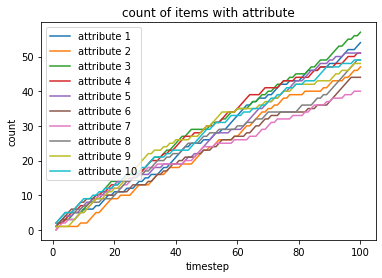

In [10]:
plt.plot(df.timestep,list(df.attributes_counts.values.T))
plt.title('count of items with attribute')
plt.legend(["attribute "+str(i+1) for i in range(10)])
plt.xlabel('timestep')
plt.ylabel('count')

Notes:
- buying and selling are happening, with the current setup we're seeing more selling than buying
- this is a pretty realistic null model since we would absolutelt expect people to dump on a market like this, the only way it might survive is if it can learn to value things appropriately

immediate ToDos (debugging scaffold) :DONE:
- fix key error :DONE:
- make sure trades trigger as expected :DONE

New next steps:
- build instrumentation to evaluate the relationship between the private prices and the arm prices

harder ToDo:
- revist the "learning" algorithm and come up with an invariant preserving mechanism such that trades manifest the updated price and the whole system can be interpreted as signal processing!